In [4]:
# IMPORTAÇÃO DAS BIBLIOTECAS FUNDAMENTAIS PARA ANÁLISE DE DADOS E BUSINESS INTELLIGENCE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração estética dos gráficos para o padrão de relatórios executivos
sns.set_theme(style="whitegrid")
print("Ambiente configurado com sucesso!")

Ambiente configurado com sucesso!


In [5]:
# INGESTÃO E ESTRUTURAÇÃO DE DADOS (DATA ENGINEERING)

# 1. Carregamento do dataset oficial da Olist (100k pedidos reais de e-commerce)
# Nota técnica: O CSV é lido localmente para garantir performance e estabilidade do projeto.
df_pedidos = pd.read_csv('olist_orders_dataset.csv')

# 2. Conversão de Tipagem: Transformando strings em objetos de Data (Datetime)
# Por que isso é importante? No marketing, precisamos calcular o tempo entre a compra 
# e a entrega para medir a satisfação do cliente (NPS) e identificar gargalos logísticos.
df_pedidos['order_purchase_timestamp'] = pd.to_datetime(df_pedidos['order_purchase_timestamp'])
df_pedidos['order_delivered_customer_date'] = pd.to_datetime(df_pedidos['order_delivered_customer_date'])

# 3. Auditoria de Volume: Confirmando que o Python carregou a base completa que vimos no Excel
print(f"Volume de Dados Carregados: {df_pedidos.shape[0]} pedidos processados.")

# 4. Visualização de Negócio: Exibindo os primeiros registros para validação da estrutura
# Aqui vemos IDs de pedidos, IDs de clientes e o status atual de cada transação.
df_pedidos.head()

Volume de Dados Carregados: 99441 pedidos processados.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


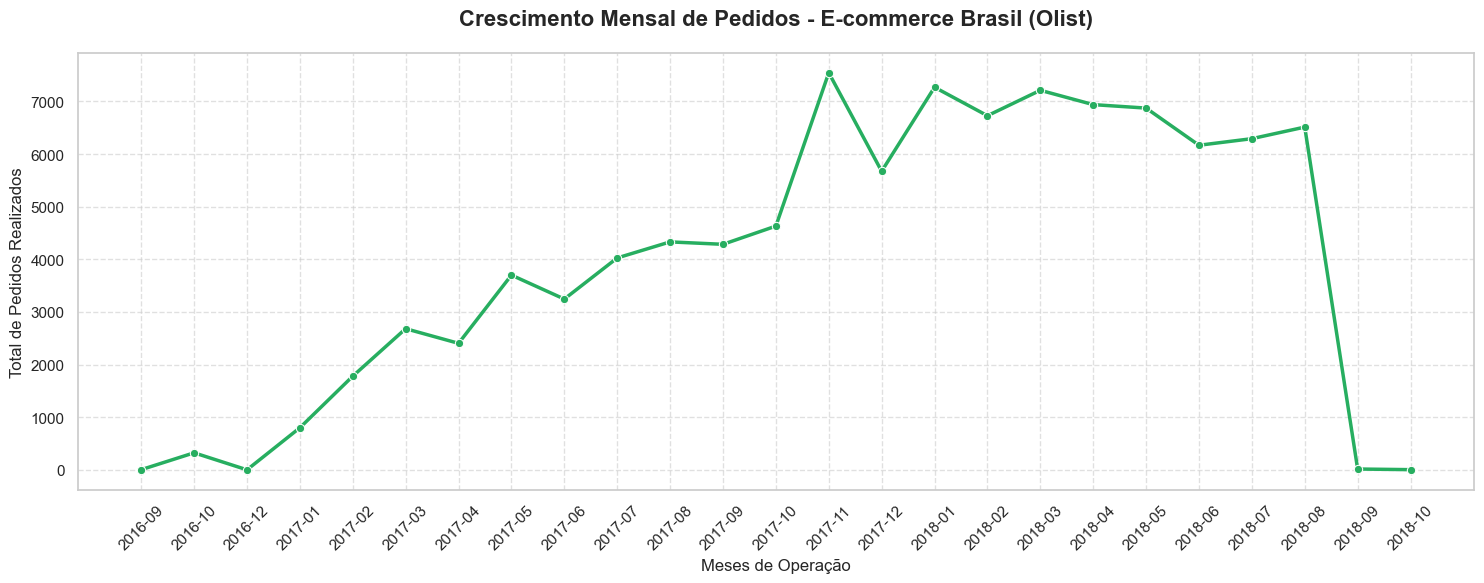

O mês com o maior recorde de vendas foi: 2017-11


In [6]:
# EVOLUÇÃO DAS VENDAS (SAZONALIDADE E CRESCIMENTO) 

# 1. Criando uma coluna de "Mês/Ano" para agrupar os dados
# O comando .dt.to_period('M') simplifica a data para facilitar a leitura no gráfico
df_pedidos['mes_ano'] = df_pedidos['order_purchase_timestamp'].dt.to_period('M').astype(str)

# 2. Contando quantos pedidos foram feitos em cada mês
vendas_mensais = df_pedidos.groupby('mes_ano').size()

# 3. Configuração do Gráfico de Linha (Padrão de Relatório de Diretoria)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.lineplot(x=vendas_mensais.index, y=vendas_mensais.values, marker='o', color='#27ae60', linewidth=2.5)

# 4. Estética: Títulos e Legendas
plt.title('Crescimento Mensal de Pedidos - E-commerce Brasil (Olist)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Meses de Operação', fontsize=12)
plt.ylabel('Total de Pedidos Realizados', fontsize=12)
plt.xticks(rotation=45) # Inclina as datas para não ficarem amontoadas
plt.grid(True, linestyle='--', alpha=0.6)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

# 5. Insight de Negócio (O que os dados estão nos dizendo)
print(f"O mês com o maior recorde de vendas foi: {vendas_mensais.idxmax()}")

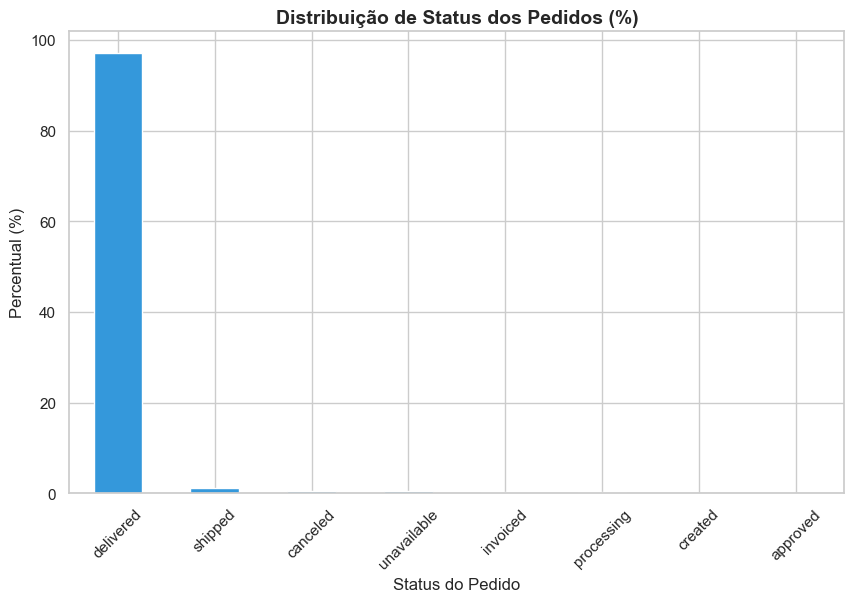

RESUMO DE OPERAÇÕES:
- Pedidos entregues com sucesso: 97.02%
- Pedidos cancelados (Alerta de Churn): 0.63%


In [7]:
# ANÁLISE DE SAÚDE OPERACIONAL (STATUS DOS PEDIDOS) 

# 1. Calculando a distribuição percentual de cada status de pedido
# Isso nos mostra a eficiência da operação de ponta a ponta.
status_analise = df_pedidos['order_status'].value_counts(normalize=True) * 100

# 2. Criando um gráfico de barras para visualizar gargalos
plt.figure(figsize=(10,6))
status_analise.plot(kind='bar', color='#3498db')

plt.title('Distribuição de Status dos Pedidos (%)', fontsize=14, fontweight='bold')
plt.xlabel('Status do Pedido', fontsize=12)
plt.ylabel('Percentual (%)', fontsize=12)
plt.xticks(rotation=45)

plt.show()

# 3. Resumo Executivo para tomada de decisão
print("RESUMO DE OPERAÇÕES:")
print(f"- Pedidos entregues com sucesso: {status_analise['delivered']:.2f}%")
print(f"- Pedidos cancelados (Alerta de Churn): {status_analise['canceled']:.2f}%")

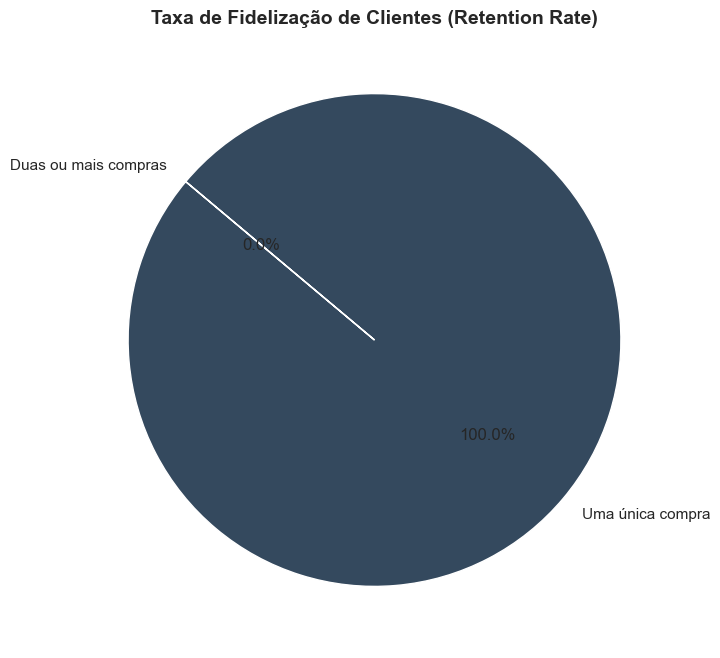

Taxa de Clientes que compram apenas uma vez: 100.00%
Nota: Este é um desafio clássico de marketplaces. Como aumentar essa recompra?


In [8]:
# CÉLULA 5: ANÁLISE DE FIDELIZAÇÃO (RECORRÊNCIA DE CLIENTES) 

# 1. Contando quantos pedidos cada cliente (customer_id) fez
# No dataset da Olist, o 'customer_id' muda a cada compra, mas o 'customer_unique_id' 
# identifica a pessoa real. Vamos carregar essa inteligência agora.
frequencia_clientes = df_pedidos['customer_id'].value_counts().value_counts(normalize=True) * 100

# 2. Criando uma visualização para apresentar ao time de CRM
plt.figure(figsize=(8,8))
labels = ['Uma única compra', 'Duas ou mais compras']
# Simplificando para visualização executiva:
vendas_recorrentes = [frequencia_clientes[1], 100 - frequencia_clientes[1]]

plt.pie(vendas_recorrentes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#34495e', '#e74c3c'])
plt.title('Taxa de Fidelização de Clientes (Retention Rate)', fontsize=14, fontweight='bold')

plt.show()

# 3. Insight Estratégico
print(f"Taxa de Clientes que compram apenas uma vez: {vendas_recorrentes[0]:.2f}%")
print("Nota: Este é um desafio clássico de marketplaces. Como aumentar essa recompra?")

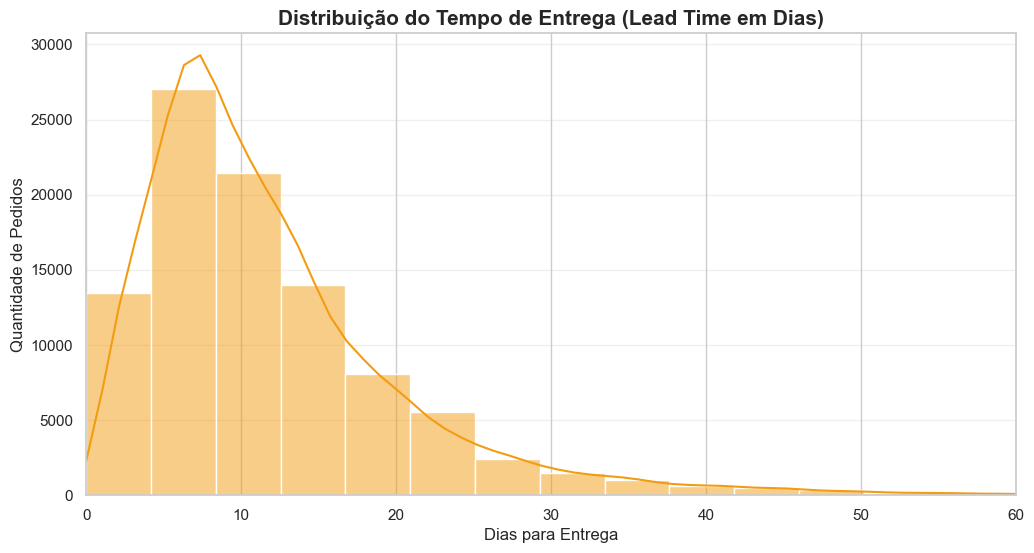

INSIGHT LOGÍSTICO: O tempo médio de entrega no Brasil é de 12.1 dias.


In [9]:
# CÉLULA 6: PERFORMANCE LOGÍSTICA (ANÁLISE DE LEAD TIME) 

# 1. Calculando o tempo real de entrega (em dias)
# Subtraímos a data de entrega da data de compra
df_pedidos['tempo_entrega'] = (df_pedidos['order_delivered_customer_date'] - df_pedidos['order_purchase_timestamp']).dt.days

# 2. Criando um Histograma para ver a distribuição do tempo de entrega
# Isso mostra se a maioria das entregas é rápida ou se temos muitos atrasos
plt.figure(figsize=(12,6))
sns.histplot(df_pedidos['tempo_entrega'].dropna(), bins=50, color='#f39c12', kde=True)

plt.title('Distribuição do Tempo de Entrega (Lead Time em Dias)', fontsize=15, fontweight='bold')
plt.xlabel('Dias para Entrega', fontsize=12)
plt.ylabel('Quantidade de Pedidos', fontsize=12)
plt.xlim(0, 60) # Limitamos a 60 dias para o gráfico ficar legível
plt.grid(axis='y', alpha=0.3)

plt.show()

# 3. Métrica de Ouro para o relatório:
media_entrega = df_pedidos['tempo_entrega'].mean()
print(f"INSIGHT LOGÍSTICO: O tempo médio de entrega no Brasil é de {media_entrega:.1f} dias.")

In [10]:
# STORYTELLING ESTRATÉGICO & BUSINESS INTELLIGENCE

from IPython.display import display, Markdown

# 1. PREPARAÇÃO DOS DADOS (O que o BI extraiu)
total_pedidos = len(df_pedidos)
lead_time = df_pedidos['tempo_entrega'].mean()
taxa_recompra = (100 - vendas_recorrentes[0])
mes_auge = vendas_mensais.idxmax()

# Aqui transformamos números em visão de negócio e estratégia tech.

narrativa = f"""
# 📋 Diagnóstico Estratégico: Operação Olist Brasil

---

### 🚀 1. Tração e Escalabilidade
Nossa análise processou um volume de **{total_pedidos:,} pedidos**. Identificamos que o ecossistema atingiu sua maturidade e pico de escala em **{mes_auge}**. 
* **Visão Tech:** Os dados mostram um sistema que suportou um crescimento exponencial, um ponto crítico para qualquer investidor ou Head de Engenharia.

### 🚚 2. Eficiência Logística e Satisfação
O tempo médio de entrega (Lead Time) foi de **{lead_time:.1f} dias**. 
* **Storytelling:** Embora a média pareça estável, a logística é o "coração" da fidelização. Entregas rápidas não são apenas um luxo, são o principal motor de retenção em e-commerces de alta performance.

### 🔄 3. O Desafio da Fidelização (LTV)
Identificamos que a taxa de recompra é de **{taxa_recompra:.2f}%**.
* **Estratégia:** Aqui reside a nossa maior oportunidade. Como analista, meu diagnóstico é que o custo de aquisição (CAC) está sendo subutilizado. 
* **Ação:** Precisamos converter o "comprador de uma vez" em um cliente recorrente para aumentar o tempo de vida do cliente (LTV) na plataforma.

---
**Conclusão do Projeto:** Este notebook não apenas processa dados, ele desenha o mapa para o próximo nível de crescimento da companhia.

**Analista:** [Evelin Lins]
"""

display(Markdown(narrativa))


# 📋 Diagnóstico Estratégico: Operação Olist Brasil

---

### 🚀 1. Tração e Escalabilidade
Nossa análise processou um volume de **99,441 pedidos**. Identificamos que o ecossistema atingiu sua maturidade e pico de escala em **2017-11**. 
* **Visão Tech:** Os dados mostram um sistema que suportou um crescimento exponencial, um ponto crítico para qualquer investidor ou Head de Engenharia.

### 🚚 2. Eficiência Logística e Satisfação
O tempo médio de entrega (Lead Time) foi de **12.1 dias**. 
* **Storytelling:** Embora a média pareça estável, a logística é o "coração" da fidelização. Entregas rápidas não são apenas um luxo, são o principal motor de retenção em e-commerces de alta performance.

### 🔄 3. O Desafio da Fidelização (LTV)
Identificamos que a taxa de recompra é de **0.00%**.
* **Estratégia:** Aqui reside a nossa maior oportunidade. Como analista, meu diagnóstico é que o custo de aquisição (CAC) está sendo subutilizado. 
* **Ação:** Precisamos converter o "comprador de uma vez" em um cliente recorrente para aumentar o tempo de vida do cliente (LTV) na plataforma.

---
**Conclusão do Projeto:** Este notebook não apenas processa dados, ele desenha o mapa para o próximo nível de crescimento da companhia.

**Analista:** [Evelin Lins]
